In [1]:
from skimage import io,filters, morphology, measure, draw,exposure
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import trackpy as tp
import pandas as pd
from scipy.stats import median_abs_deviation
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from sklearn.neighbors import KernelDensity
from skimage.filters import threshold_otsu
import seaborn as sns
import sys
sys.path.insert(1, '<PATH/TO/DIR/>WAVE/')
import identify_rings as idr
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = '<PATH/TO/DIR/>WAVE/Fig5E_S3I_PRD_truncation/Nanorings/'

In [4]:
def f_linear(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B



# Quantification of WAVE complex nanorings

In [5]:
name = 'example_images/250319_eGFP_Abi2-dPRD_latb_tirf_1-11_SIR.tif'
image = io.imread(PATH +name)

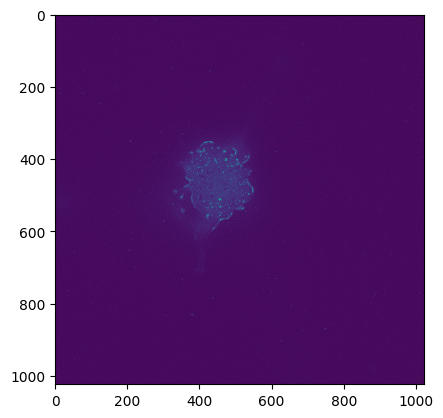

In [6]:
plt.imshow(image[0])

In [7]:
opt_threshold = threshold_otsu(image)
opt_threshold

113.371185

7.0 5.1000000000000005 0.7204301075268817


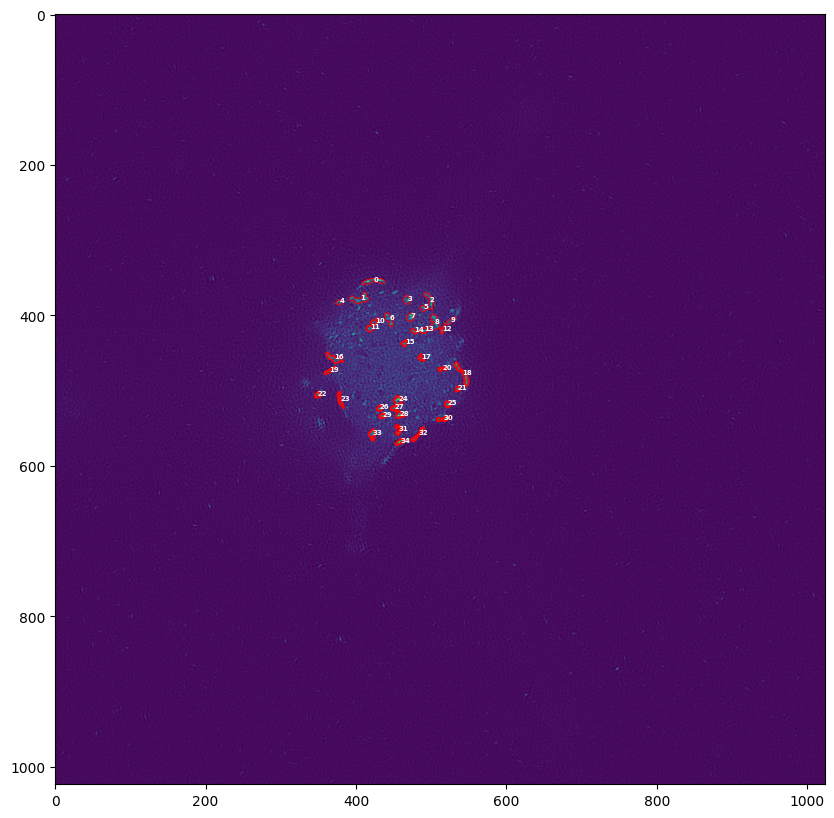

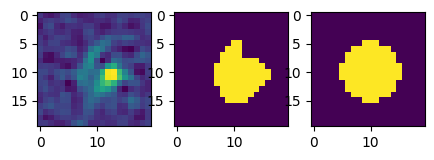

11.0 3.2 0.7380952380952381


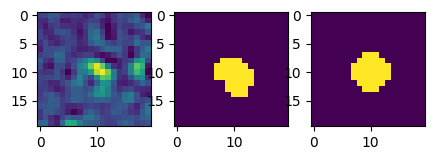

18.0 5.0 0.8


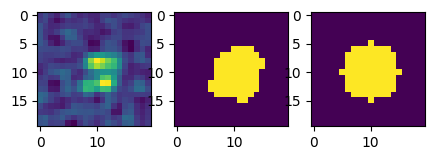

31.0 4.2 0.8166666666666667


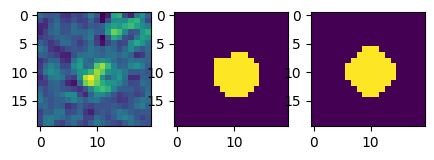

35.0 4.5 0.68


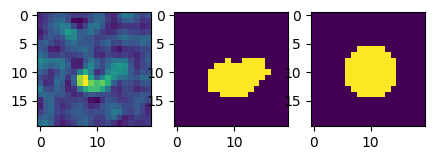

55.0 4.0 0.6607142857142857


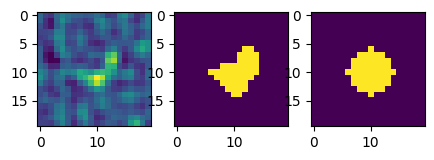

140.0 3.2 0.7


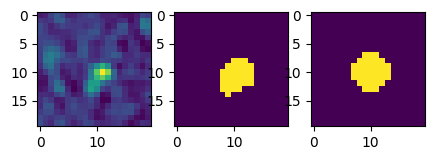

147.0 3.7 0.6862745098039216


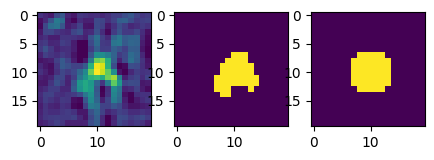

157.0 5.7 0.8055555555555556


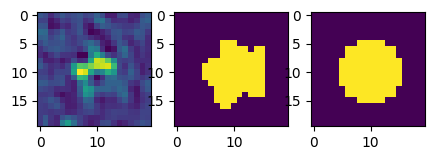

162.0 3.7 0.8936170212765957


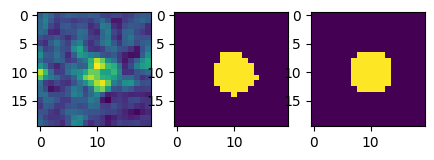

164.0 3.7 0.7659574468085106


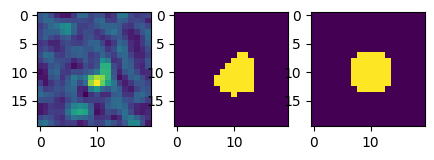

166.0 3.2 0.6590909090909091


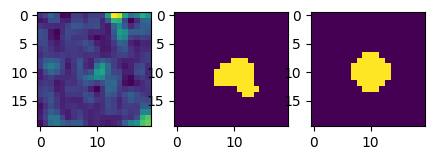

175.0 4.2 0.7230769230769231


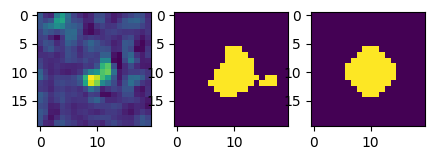

178.0 3.2 0.6590909090909091


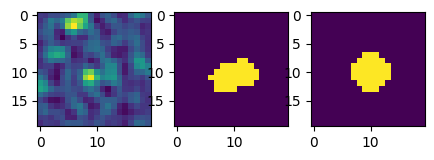

5.0 5.4 0.6788990825688074


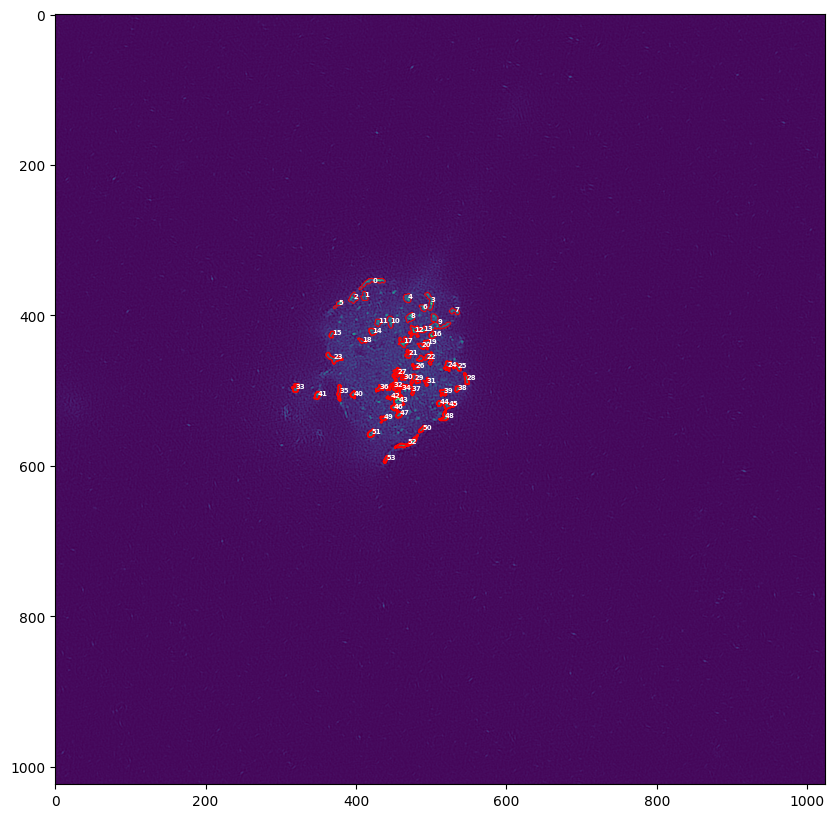

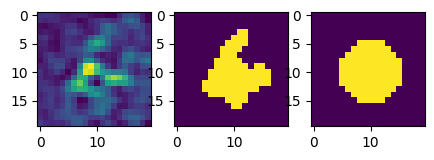

7.0 5.1000000000000005 0.7755102040816326


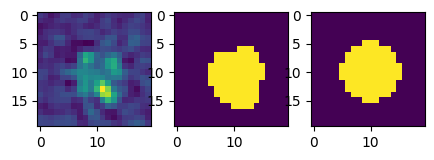

17.0 5.9 0.6923076923076923


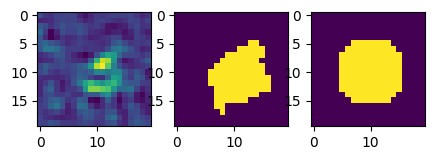

27.0 4.2 0.7014925373134329


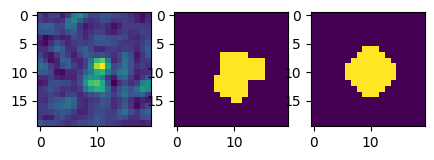

40.0 3.7 0.6909090909090909


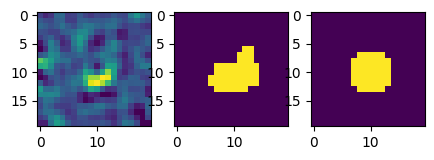

42.0 4.300000000000001 0.7123287671232876


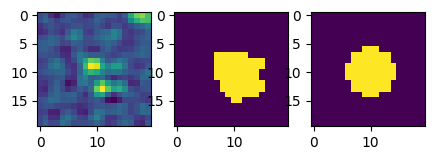

50.0 4.2 0.6935483870967742


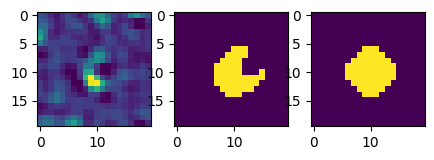

65.0 3.7 0.6724137931034483


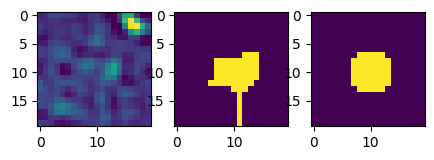

169.0 3.2 0.7380952380952381


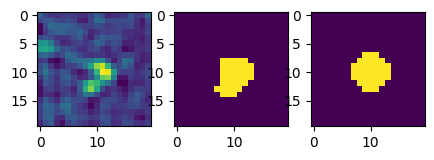

178.0 3.2 0.6888888888888889


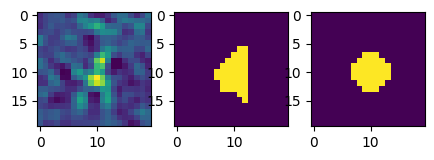

180.0 4.5 0.6756756756756757


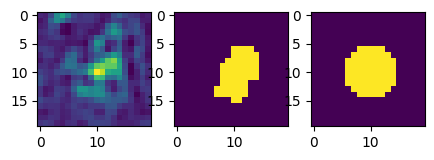

195.0 3.7 0.7777777777777778


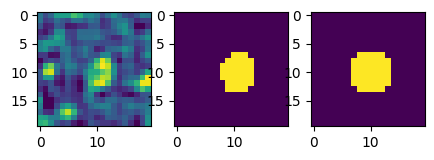

200.0 3.2 0.7317073170731707


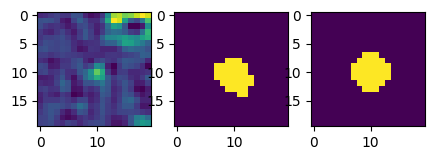

207.0 4.5 0.6891891891891891


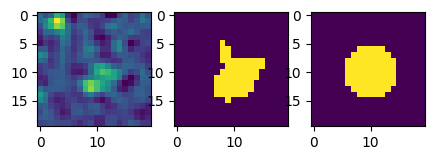

226.0 4.5 0.7631578947368421


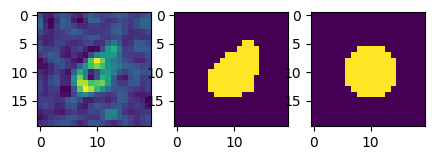

8.0 5.0 0.7373737373737373


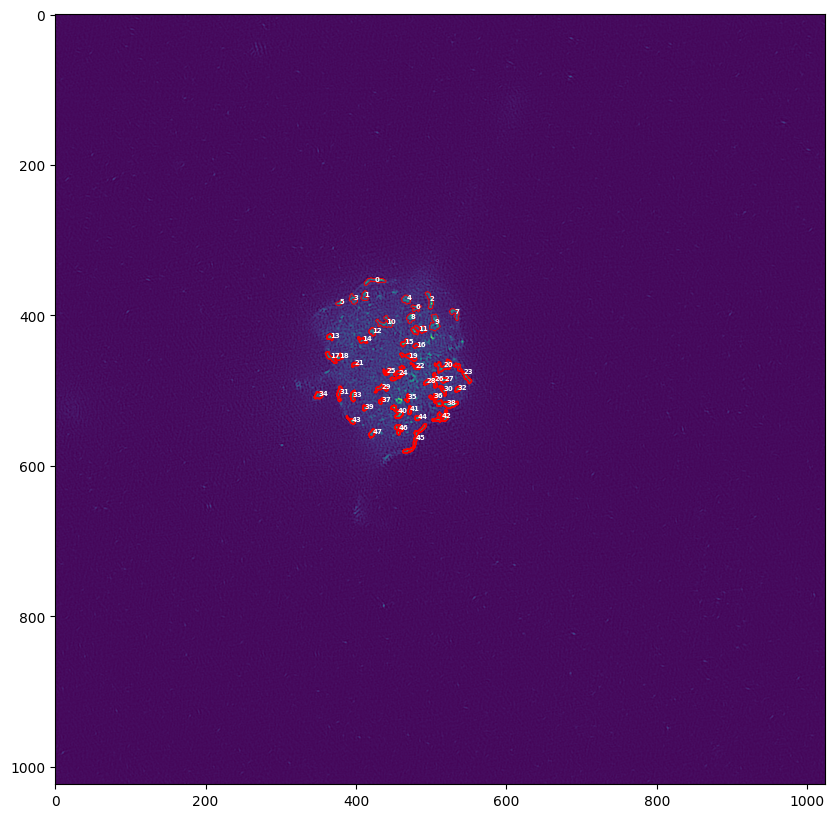

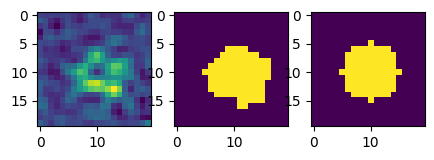

19.0 5.4 0.7129629629629629


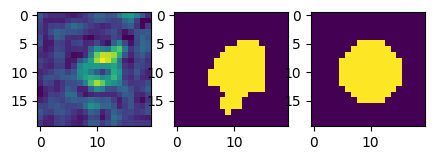

39.0 4.300000000000001 0.7887323943661971


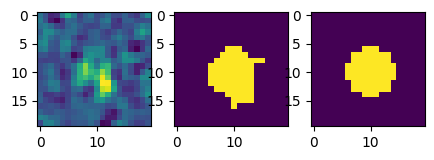

51.0 3.7 0.7735849056603774


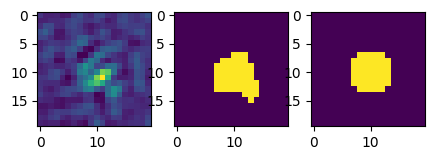

69.0 3.2 0.6585365853658537


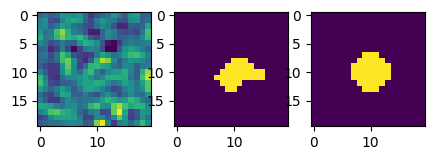

136.0 4.2 0.7333333333333333


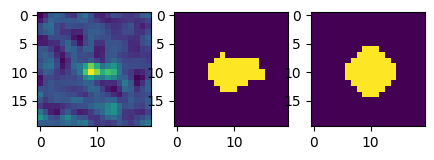

156.0 3.7 0.723404255319149


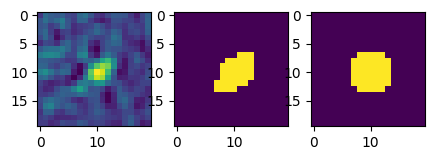

160.0 5.0 0.7613636363636364


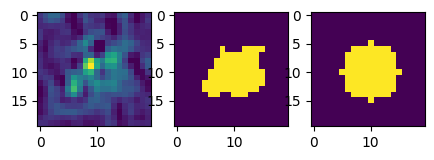

175.0 3.2 0.7


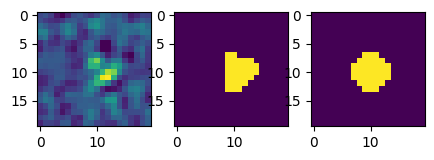

191.0 3.2 0.7142857142857143


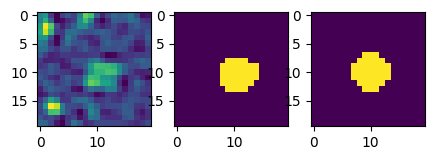

199.0 5.4 0.6574074074074074


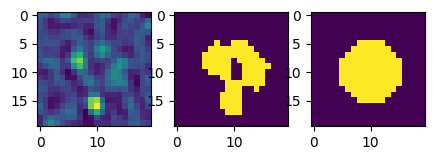

7.0 5.9 0.8103448275862069


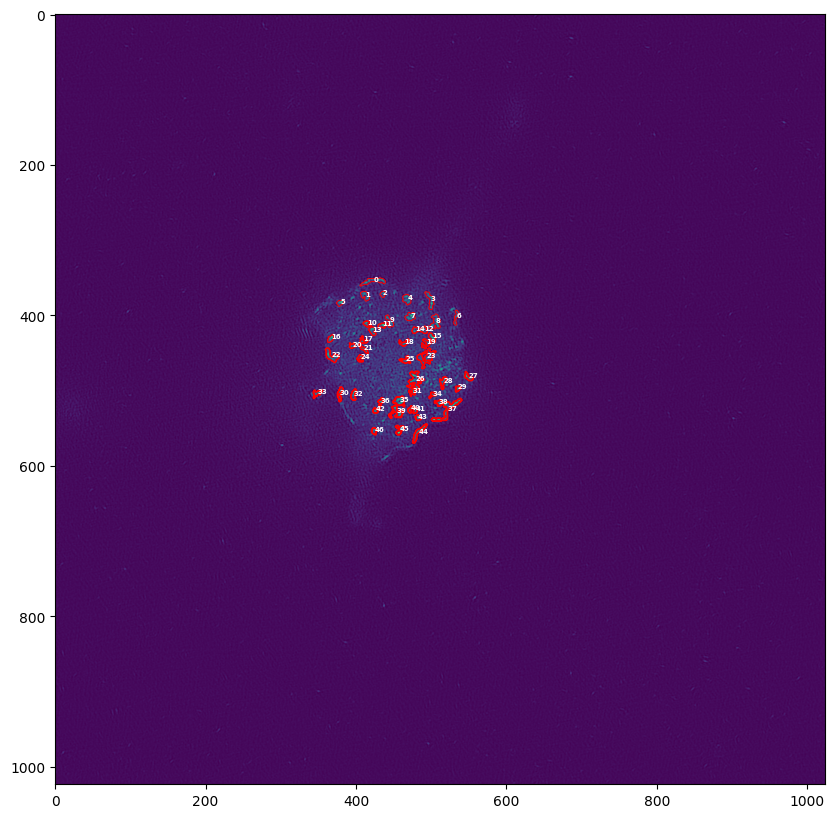

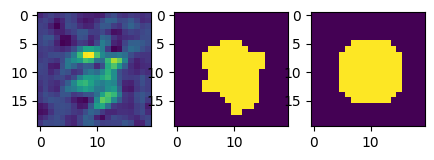

10.0 3.2 0.6666666666666666


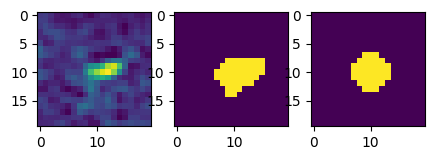

23.0 5.9 0.7478260869565218


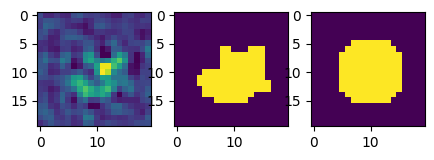

33.0 4.2 0.7121212121212122


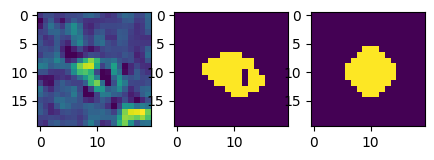

46.0 4.2 0.7424242424242424


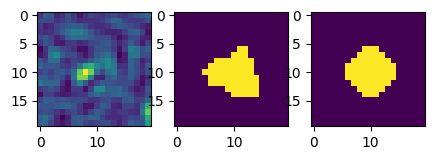

47.0 4.5 0.6951219512195121


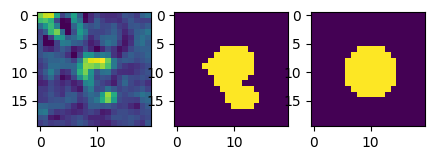

48.0 4.2 0.6875


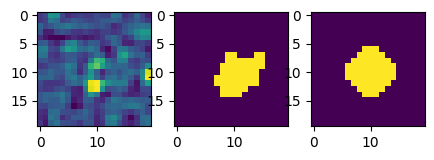

72.0 3.7 0.723404255319149


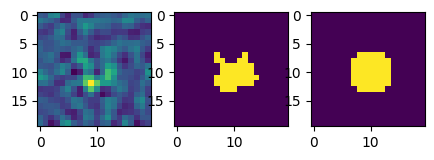

160.0 3.2 0.6590909090909091


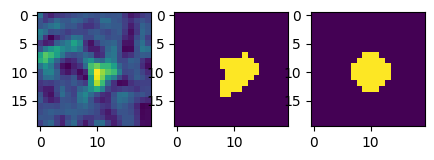

182.0 4.300000000000001 0.6865671641791045


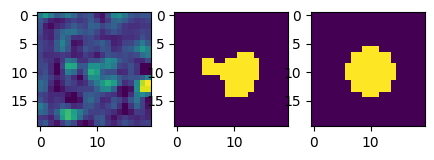

190.0 3.7 0.68


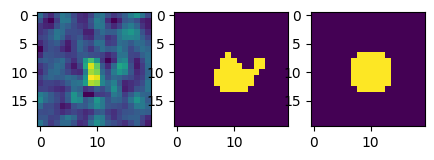

200.0 3.2 0.8292682926829268


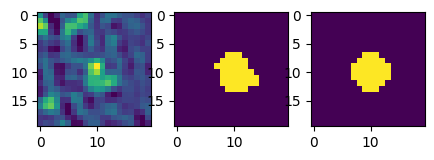

210.0 3.2 0.7608695652173914


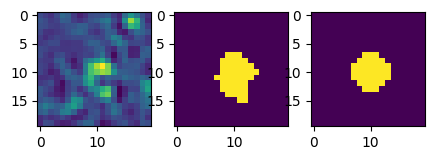

2.0 3.2 0.8048780487804879


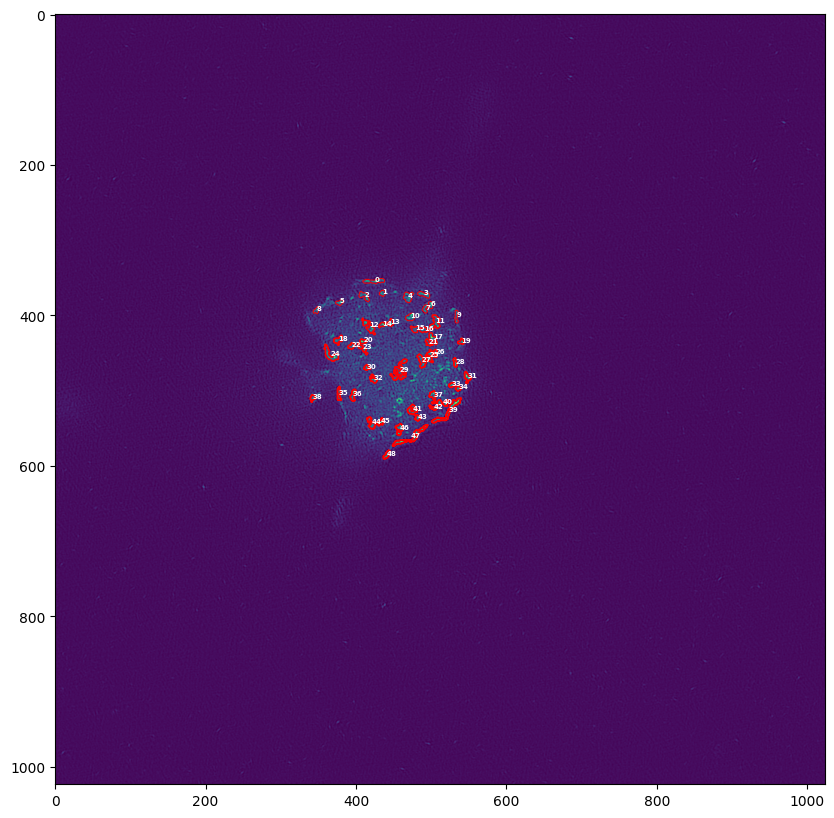

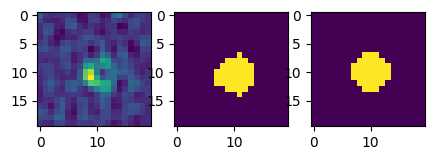

6.0 5.7 0.7058823529411765


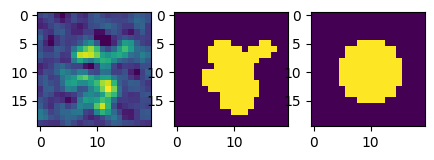

9.0 4.2 0.6610169491525424


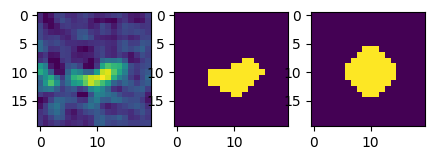

24.0 5.0 0.7816091954022989


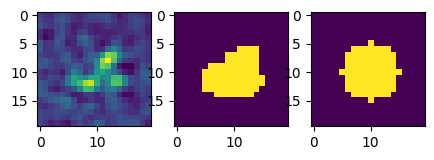

34.0 3.7 0.7307692307692307


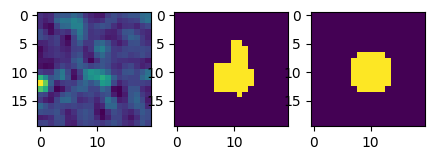

41.0 4.300000000000001 0.6619718309859155


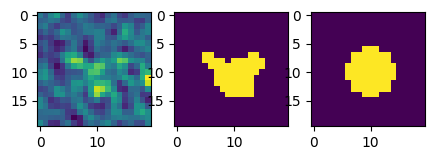

57.0 3.2 0.6739130434782609


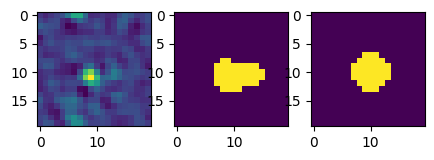

63.0 4.2 0.7


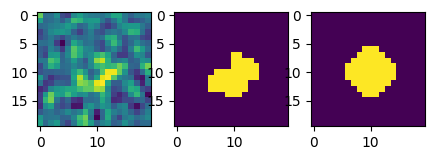

105.0 3.2 0.7317073170731707


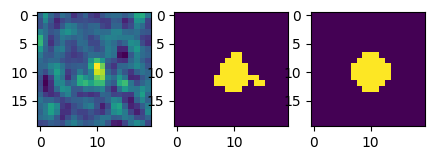

131.0 3.2 0.6976744186046512


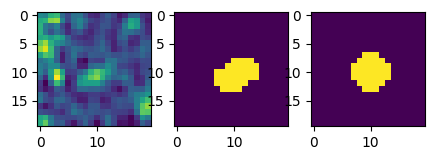

133.0 3.2 0.7073170731707317


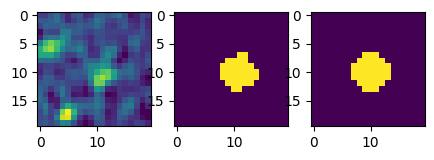

150.0 3.2 0.6976744186046512


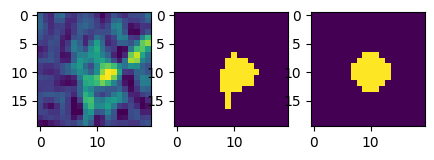

174.0 3.7 0.68


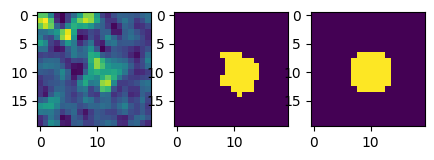

In [8]:
rings = pd.DataFrame()
for i in range(image.shape[0]):
    prop, label_mask_clean = idr.seg_cells(image[i], 205, 1.2, 30, 300, True)
    features = pd.DataFrame()
    for j in range(len(prop)): 
        y_center, x_center = prop[j].centroid # note that image coordinates are often given as (y, x) rather than (x, y)
        plt.text(x_center, y_center, str(j), fontweight = 'bold', color = 'white',size = 5)

        features = features.append([{'label':prop[j].label,'x': prop[j].centroid[0],
                                     'y': prop[j].centroid[1],'length': prop[j].major_axis_length,'frame': i}])
    results = idr.ring_fitting(image[i], label_mask_clean, features, 10, 0.65, True)
    if "intensity" in results:
        rings = rings.append(results[results.intensity>0])
rings['final_intensity'] = rings['intensity'] - rings['background']
rings['unit_intensity'] = rings['final_intensity']/rings['perimeter']
rings['cell'] = name

In [9]:
len(rings)/5

13.2

In [10]:
WAVE2_dPRD_rings=pd.DataFrame()
WAVE2_dPRD_rings = WAVE2_dPRD_rings.append(rings)

In [11]:
WAVE2_dPRD_rings

index  label           x           y     length  frame    r     score  \
3       0      7  379.507042  467.929577  10.220469      0  5.1  0.720430   
5       0     11  390.750000  489.138889   7.914641      0  3.2  0.738095   
7       0     18  402.375000  472.583333  10.525991      0  5.0  0.800000   
11      0     31  417.519231  418.461538   8.295933      0  4.2  0.816667   
13      0     35  419.929825  490.596491  11.164670      0  4.5  0.680000   
..    ...    ...         ...         ...        ...    ...  ...       ...   
30      0    105  469.470588  414.323529   7.740050      4  3.2  0.731707   
33      0    131  492.500000  527.500000   8.589145      4  3.2  0.697674   
34      0    133  497.090909  535.848485   6.697412      4  3.2  0.707317   
38      0    150  509.805556  342.416667   8.577695      4  3.2  0.697674   
43      0    174  536.179487  481.974359   7.851742      4  3.7  0.680000   

       intensity   background       area  perimeter  diameter(nm)  \
3   25334.738281  8644.320828  81.712825  32.044245         408.0   
5   10867.715820  4673.098613  32.169909  20.106193         256.0   
7   28107.195312  9401.638992  78.539816  31.415927         400.0   
11  16167.893555  8097.066114  55.417694  26.389378         336.0   
13  19177.660156  9452.501251  63.617251  28.274334         360.0   
..           ...          ...        ...        ...           ...   
30   9692.949219  5371.527716  32.169909  20.106193         256.0   
33  10587.184570  6870.127946  32.169909  20.106193         256.0   
34  11114.349609  5467.723141  32.169909  20.106193         256.0   
38   9953.107422  3605.348873  32.169909  20.106193         256.0   
43  12344.326172  6367.957748  43.008403  23.247786         296.0   

     length(um)  final_intensity  unit_intensity  \
3   1281.769803     16690.417453      520.855380   
5    804.247719      6194.617207      308.094984   
7   1256.637061     18705.556320      595.416350   
11  1055.575132      8070.827441      305.836210   
13  1130.973355      9725.158905      343.957136   
..          ...              ...             ...   
30   804.247719      4321.421502      214.929873   
33   804.247719      3717.056624      184.871230   
34   804.247719      5646.626468      280.840161   
38   804.247719      6347.758548      315.711610   
43   929.911425      5976.368424      257.072588   

                                                 cell  
3   example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  
5   example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  
7   example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  
11  example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  
13  example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  
..                                                ...  
30  example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  
33  example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  
34  example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  
38  example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  
43  example_images/250319_eGFP_Abi2-dPRD_latb_tirf...  

[66 rows x 17 columns]

# Quantification of cytosolic expression level

In [12]:
name = "example_images/250319_eGFP_Abi2-dPRD_latb_epi_1-11.tif"
image_epi = io.imread(PATH + name)

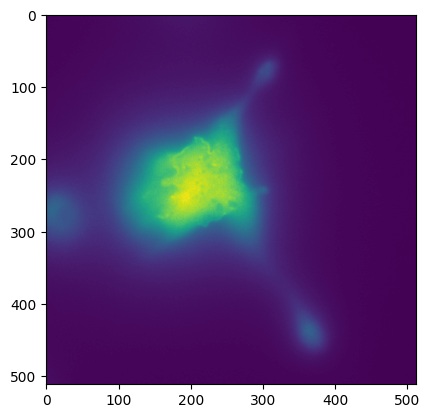

In [13]:
plt.imshow(image_epi[3])

In [14]:
thres = threshold_otsu(image_epi)
thres

4232

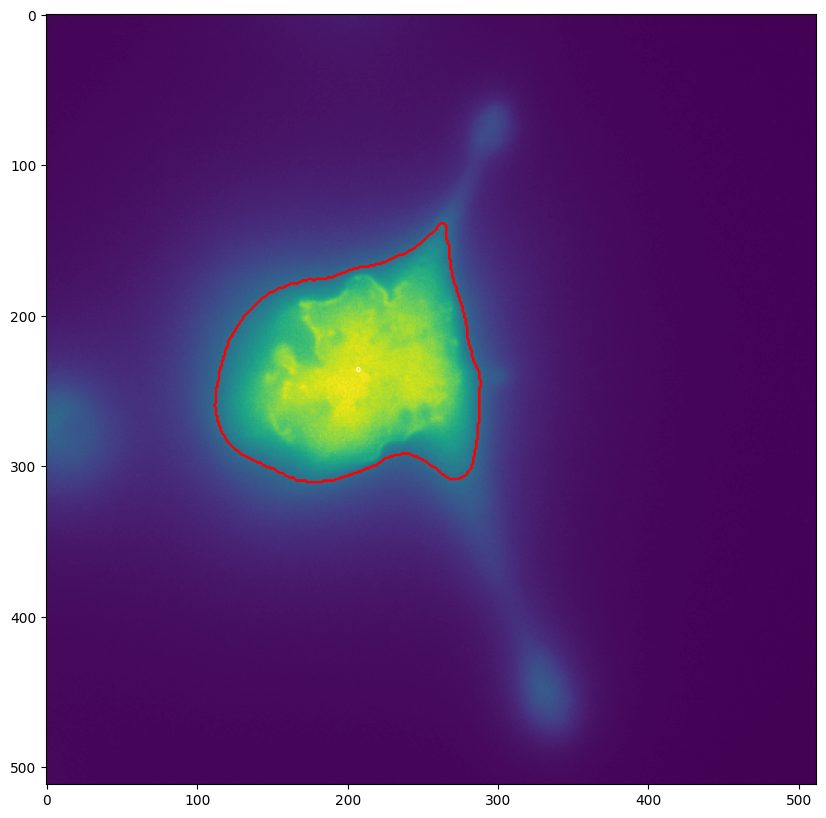

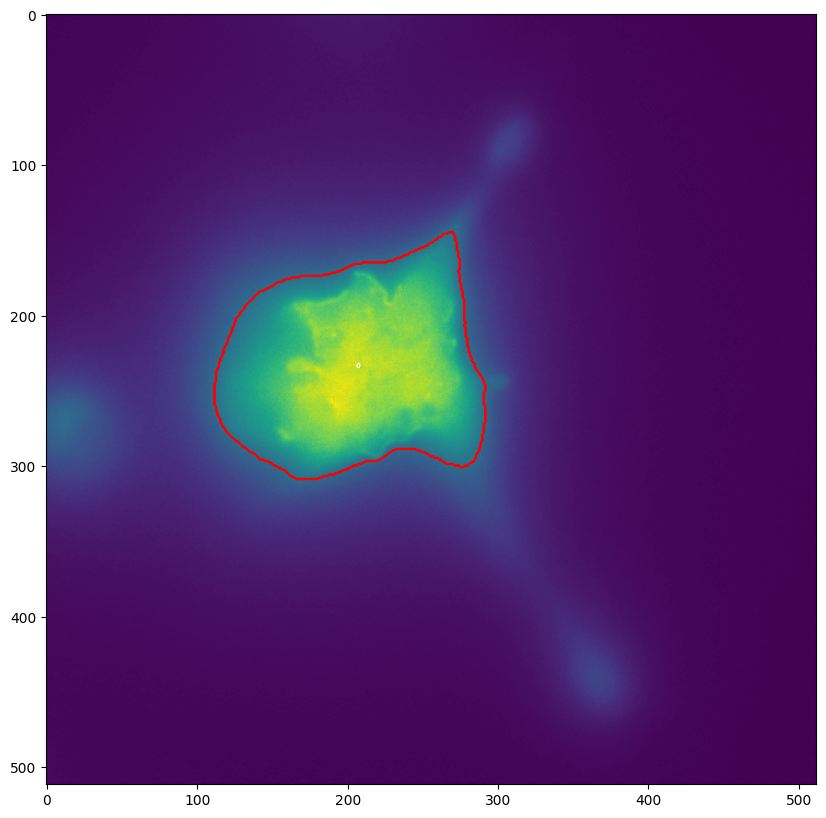

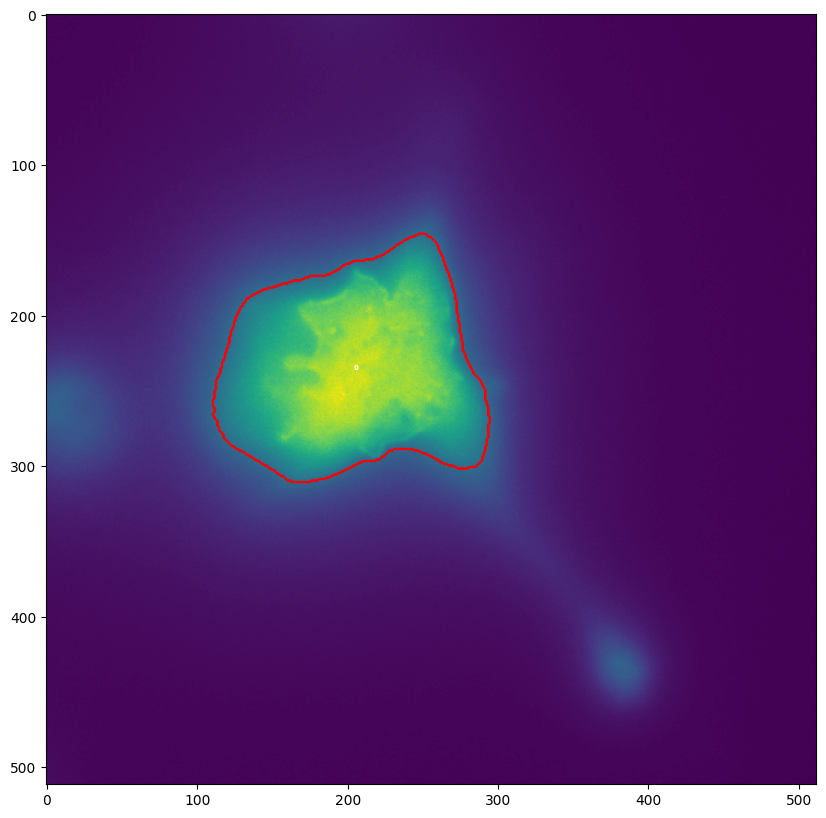

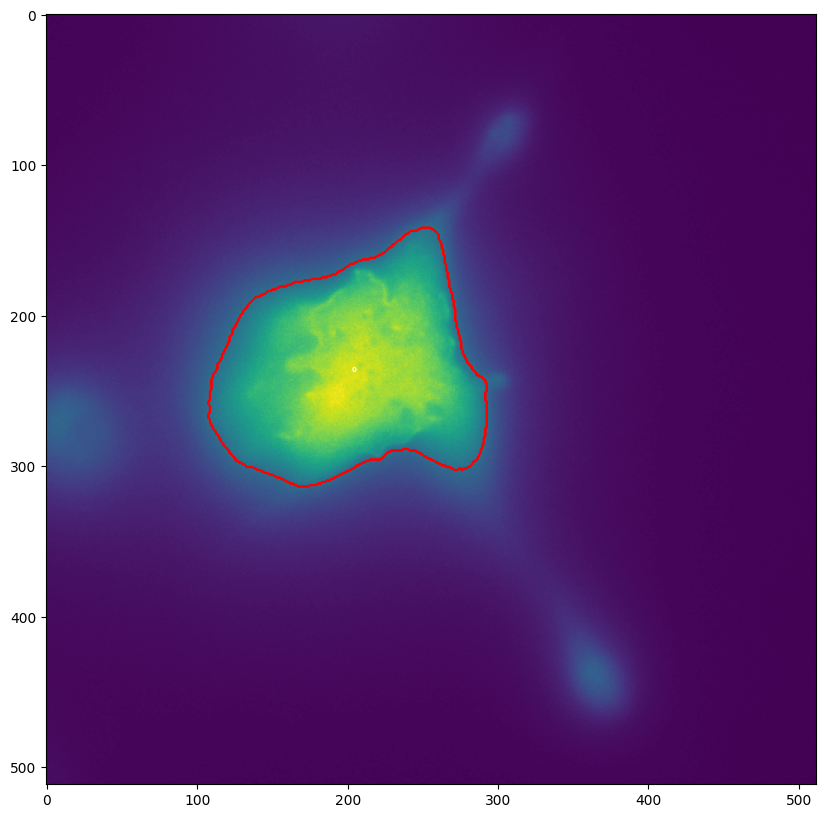

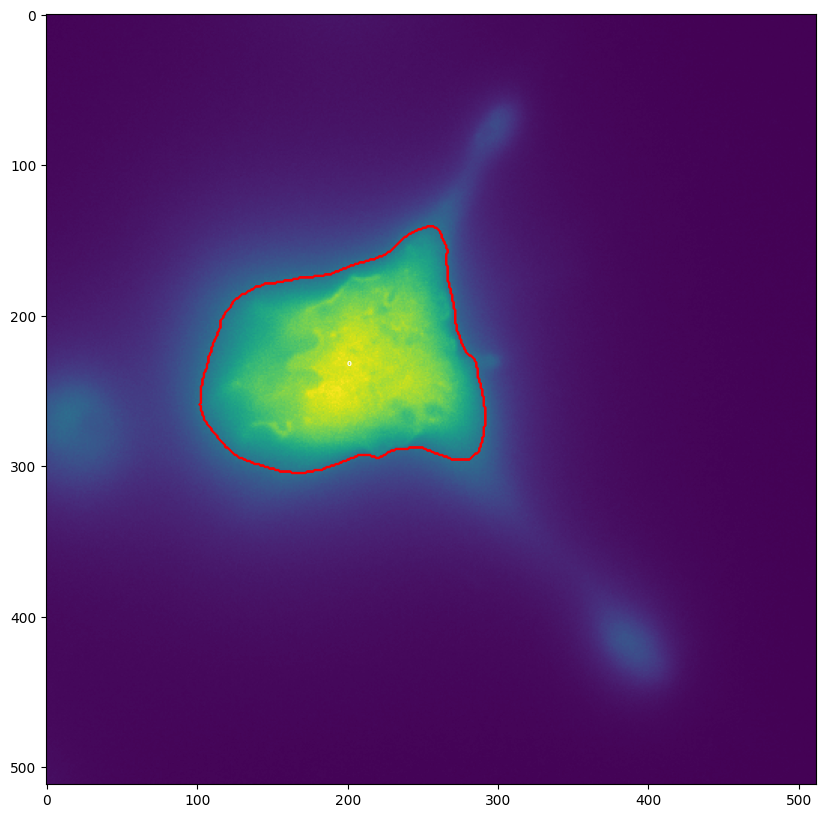

In [15]:
features = pd.DataFrame()
for i in range(5):
    prop,label_mask_clean = idr.seg_cells(image_epi[i],thres,1.2,10000,1200000,True)
    
    for j in range(len(prop)): 
        y_center, x_center = prop[j].centroid # note that image coordinates are often given as (y, x) rather than (x, y)
        plt.text(x_center, y_center, str(j), fontweight = 'bold', color = 'white',size = 5)

        features = features.append([{'label':prop[j].label,'x': prop[j].centroid[0],
                                 'y': prop[j].centroid[1],'frame': i,
                                    'area':prop[j].area,'intensity':prop[j].intensity_mean}])
epi_intens = features.intensity.mean()

In [16]:
epi_intens

7608.441193221275

In [17]:
express_level_lamel = pd.DataFrame()

In [18]:
express_level_lamel.at[len(express_level_lamel),'express_level'] = epi_intens
express_level_lamel.at[len(express_level_lamel)-1,'cell'] = name

In [19]:
express_level_lamel

express_level                                               cell
0    7608.441193  example_images/250319_eGFP_Abi2-dPRD_latb_epi_...

# Generate plots

In [20]:
def unique_without_sort(arr):
    unique_list = []
    seen = set()
    for x in arr:
        if x not in seen:
            unique_list.append(x)
            seen.add(x)
    return np.array(unique_list)

In [21]:
Abi2_FL_exp = pd.read_csv(PATH + 'csv_files/Abi2-FL_expression_level.csv',index_col=0)
Abi2_dPRD_exp = pd.read_csv(PATH + 'csv_files/Abi2-dPRD_expression_level.csv',index_col=0)
Abi2_FL_rings = pd.read_csv(PATH + 'csv_files/Abi2-FL_rings.csv',index_col=0)
Abi2_dPRD_rings = pd.read_csv(PATH + 'csv_files/Abi2-dPRD_rings.csv',index_col=0)

In [22]:
WAVE2_FL_exp = pd.read_csv(PATH + 'csv_files/WAVE2-FL_expression_level.csv',index_col=0)
WAVE2_dPRD_exp = pd.read_csv(PATH + 'csv_files/WAVE2-dPRD_expression_level.csv',index_col=0)
WAVE2_FL_rings = pd.read_csv(PATH + 'csv_files/WAVE2-FL_rings.csv',index_col=0)
WAVE2_dPRD_rings = pd.read_csv(PATH + 'csv_files/WAVE2-dPRD_rings.csv',index_col=0)

In [23]:
Abi2_dPRD_rings_count = []
for name in unique_without_sort(Abi2_dPRD_rings.cell):
    cur = Abi2_dPRD_rings[Abi2_dPRD_rings.cell == name]
    Abi2_dPRD_rings_count.append(len(cur)/5)

In [24]:
Abi2_FL_rings_count = []
for name in unique_without_sort(Abi2_FL_rings.cell):
    cur = Abi2_FL_rings[Abi2_FL_rings.cell == name]
    Abi2_FL_rings_count.append(len(cur)/5)

In [25]:
WAVE2_dPRD_rings_count = []
for name in unique_without_sort(WAVE2_dPRD_rings.cell):
    cur = WAVE2_dPRD_rings[WAVE2_dPRD_rings.cell == name]
    WAVE2_dPRD_rings_count.append(len(cur)/5)

In [26]:
WAVE2_FL_rings_count = []
for name in unique_without_sort(WAVE2_FL_rings.cell):
    cur = WAVE2_FL_rings[WAVE2_FL_rings.cell == name]
    WAVE2_FL_rings_count.append(len(cur)/5)

In [27]:
Abi2_FL_exp['rings_count']=Abi2_FL_rings_count
Abi2_dPRD_exp['rings_count']=Abi2_dPRD_rings_count

In [28]:
WAVE2_FL_exp['rings_count']=WAVE2_FL_rings_count
WAVE2_dPRD_exp['rings_count']=WAVE2_dPRD_rings_count

In [29]:
from statsmodels.multivariate.manova import MANOVA

In [30]:
Abi2_dPRD_exp['protein'] = 'Abi2ΔPRD'
Abi2_FL_exp['protein'] = 'Abi2'
WAVE2_dPRD_exp['protein'] = 'WAVE2ΔPRD'
WAVE2_FL_exp['protein'] = 'WAVE2'

In [31]:
Abi2_full = Abi2_dPRD_exp.append(Abi2_FL_exp)
WAVE2_full = WAVE2_dPRD_exp.append(WAVE2_FL_exp)

In [32]:
fit = MANOVA.from_formula('express_level + rings_count ~ protein', data=WAVE2_full)
print(fit.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.1885 2.0000 27.0000 58.1324 0.0000
         Pillai's trace 0.8115 2.0000 27.0000 58.1324 0.0000
 Hotelling-Lawley trace 4.3061 2.0000 27.0000 58.1324 0.0000
    Roy's greatest root 4.3061 2.0000 27.0000 58.1324 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
        protein         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.4865 2.0000 27.0000 14.2493 0.0001
         Pillai's trace 0.5135 2.0000 27.0000 14.2493 0.0001
 Hotelling-Lawley trace 1.0555 2.0000 27.0

In [33]:
fit = MANOVA.from_formula('express_level + rings_count ~ protein', data=Abi2_full)
print(fit.mv_test().summary())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value  Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.1024 2.0000 28.0000 122.7637 0.0000
         Pillai's trace 0.8976 2.0000 28.0000 122.7637 0.0000
 Hotelling-Lawley trace 8.7688 2.0000 28.0000 122.7637 0.0000
    Roy's greatest root 8.7688 2.0000 28.0000 122.7637 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         protein         Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.2921 2.0000 28.0000 33.9341 0.0000
          Pillai's trace 0.7079 2.0000 28.0000 33.9341 0.0000
  Hotelling-Lawley trace 2

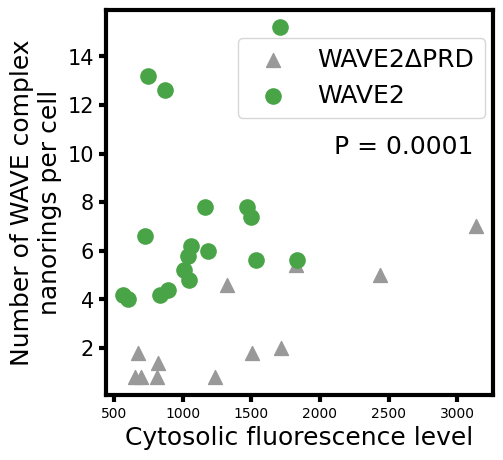

In [34]:
fig,ax  = plt.subplots(figsize = (5,5))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size = 5)

plt.scatter(WAVE2_dPRD_exp.express_level,WAVE2_dPRD_exp.rings_count,label = 'WAVE2ΔPRD',s = 100,c= '#999999',marker = '^')
plt.scatter(WAVE2_FL_exp.express_level,WAVE2_FL_exp.rings_count,label = 'WAVE2',s = 120,c= '#48a446',marker = 'o')
plt.ylabel('Number of WAVE complex\nnanorings per cell',size = 18)
plt.xlabel('Cytosolic fluorescence level',size = 18)
plt.yticks(size = 15)
plt.legend(bbox_to_anchor=(1.01, 0.96),fontsize = 18)
plt.text(2100,10,'P = 0.0001',size = 18)
plt.savefig(PATH +'Fig5E_WAVE2_rings.png',bbox_inches= 'tight',dpi = 300)

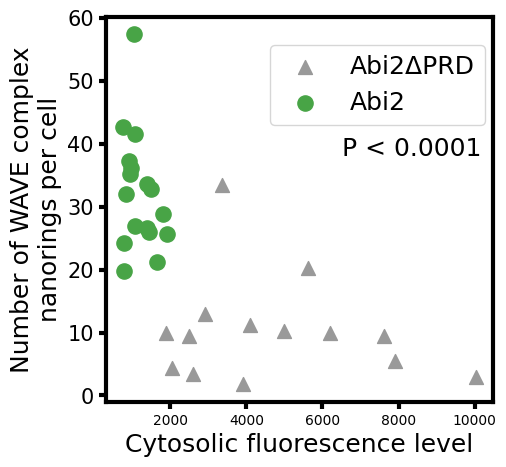

In [35]:
fig,ax  = plt.subplots(figsize = (5,5))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size = 5)

plt.scatter(Abi2_dPRD_exp.express_level,Abi2_dPRD_exp.rings_count,label = 'Abi2ΔPRD',s = 100,c= '#999999',marker = '^')
plt.scatter(Abi2_FL_exp.express_level,Abi2_FL_exp.rings_count,label = 'Abi2',s = 120,c= '#48a446',marker = 'o')
plt.ylabel('Number of WAVE complex\nnanorings per cell',size = 18)
plt.xlabel('Cytosolic fluorescence level',size = 18)
plt.yticks(size = 15)
plt.legend(bbox_to_anchor=(1.01, 0.96),fontsize = 18)
plt.text(6500,38,'P < 0.0001',size = 18)
plt.savefig(PATH +'Fig5E_Abi2_rings.png',bbox_inches= 'tight',dpi = 300)